# ABCD Method for estimating the Z-QCD correction factors.

In [1]:
import os
import sys
import matplotlib.pyplot as plt
print("Adding the following path to sys.path:", os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd())) # Needed to load all the modules in the parent directory
from histogramHelpers import biner,ratioDataMinusBG
from AnalysisCommons.Run import INFO, WARNING, ERROR, DEBUG, Logger
Logger.LOGLEVEL = 3 # Set the log level

Adding the following path to sys.path: /Users/user/Documents/HEP/VBF-Analysis


## Test if EWjj model makes a difference in CRs

INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]


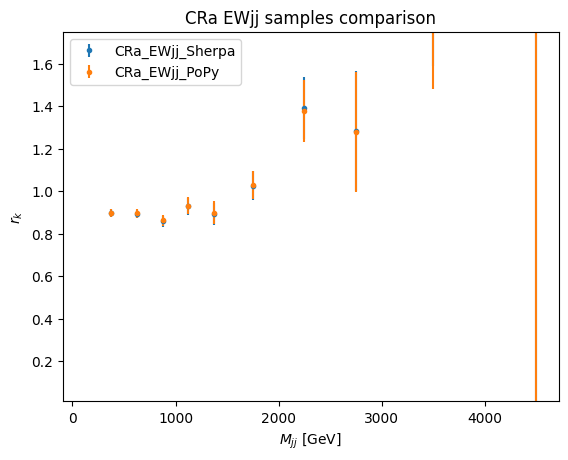

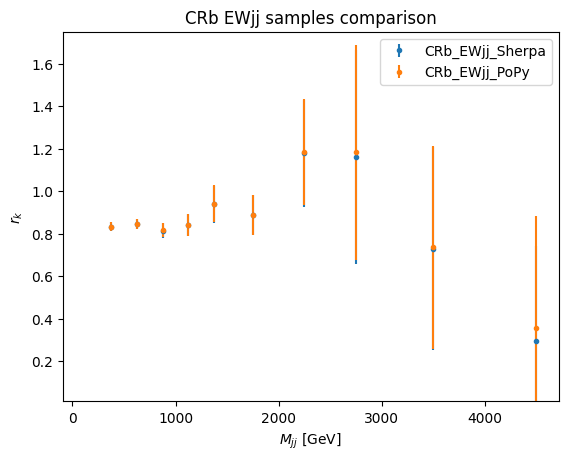

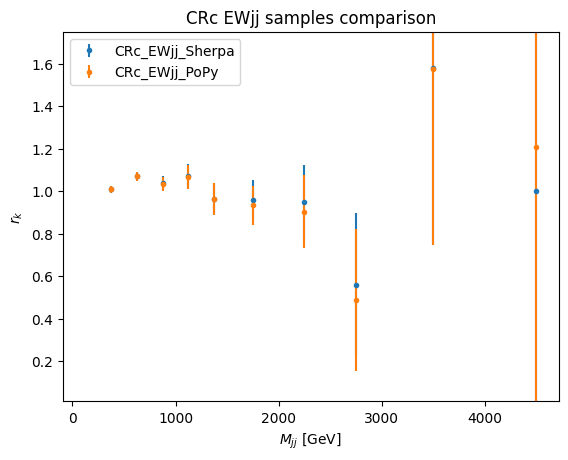

In [2]:
root_path = '/Users/user/Documents/HEP/VBF-Analysis/VBFAnalysisPlots/Zll/NewZpeak/'
path_CRa = root_path+"CRa"
path_CRb = root_path+"CRb"
path_CRc = root_path+"CRc"
signal = "Zll_MGNLO"
QCD_sample_type = signal.replace('Zll_','')

histo={
"mass_jj":[[1500,3000],[250,500,1000],250],
}

scaleFactors = {"Signal_Sherpa":1.0,"Signal_PoPy":1.0}

# Sherpa for EWjj
EWjjSample = "Signal_Sherpa"
bg_samples = [EWjjSample,"VV","VV_EWK","Wjets","ttbar","singletop"]
CRa_axis,CRa_y,CRa_error=ratioDataMinusBG(path_to_samples=path_CRa,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRb_axis,CRb_y,CRb_error=ratioDataMinusBG(path_to_samples=path_CRb,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRc_axis,CRc_y,CRc_error=ratioDataMinusBG(path_to_samples=path_CRc,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)

# Powheg+Pythia for EWjj + scaling
EWjjSample = "Signal_PoPy"
bg_samples = [EWjjSample,"VV","VV_EWK","Wjets","ttbar","singletop"]
CRa2_axis,CRa2_y,CRa2_error=ratioDataMinusBG(path_to_samples=path_CRa,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRb2_axis,CRb2_y,CRb2_error=ratioDataMinusBG(path_to_samples=path_CRb,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRc2_axis,CRc2_y,CRc2_error=ratioDataMinusBG(path_to_samples=path_CRc,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)


# Plot CRa
plt.errorbar(CRa_axis,CRa_y,yerr=CRa_error,fmt='.')
plt.errorbar(CRa2_axis,CRa2_y,yerr=CRa2_error,fmt='.')
plt.legend(['CRa_EWjj_Sherpa','CRa_EWjj_PoPy'])
plt.xlabel(r'$M_{jj}$ [GeV]')
plt.ylabel(r"$r_k$")
plt.title('CRa EWjj samples comparison')
plt.ylim(0.01,1.75)
plt.show()
# Plot CRb
plt.errorbar(CRb_axis,CRb_y,yerr=CRb_error,fmt='.')
plt.errorbar(CRb2_axis,CRb2_y,yerr=CRb2_error,fmt='.')
plt.legend(['CRb_EWjj_Sherpa','CRb_EWjj_PoPy'])
plt.xlabel(r'$M_{jj}$ [GeV]')
plt.ylabel(r"$r_k$")
plt.title('CRb EWjj samples comparison')
plt.ylim(0.01,1.75)
plt.show()
# Plot CRc
plt.errorbar(CRc_axis,CRc_y,yerr=CRc_error,fmt='.')
plt.errorbar(CRc2_axis,CRc2_y,yerr=CRc2_error,fmt='.')
plt.legend(['CRc_EWjj_Sherpa','CRc_EWjj_PoPy'])
plt.xlabel(r'$M_{jj}$ [GeV]')
plt.ylabel(r"$r_k$")
plt.title('CRc EWjj samples comparison')
plt.ylim(0.01,1.75)
plt.show()

## Using mid point in the bins for the fit

In [3]:
print('X axis being used for CRa:', CRa_axis[1:], 'GeV')
print('X axis being used for CRb:', CRb_axis[1:], 'GeV')
print('X axis being used for CRc:', CRc_axis[1:], 'GeV')

X axis being used for CRa: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.] GeV
X axis being used for CRb: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.] GeV
X axis being used for CRc: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.] GeV


## Fits in the CRs

In [4]:
from MjjFit import linear_model, parabolic_model, exponential_model, mjj_fit_experiment, FitExperimentContainer

experiments = FitExperimentContainer()

# EWjj Sherpa | QCDjj X - Linear and Parabolic fits
mjj_fit_experiment(linear_model, CRa_axis[1:], CRa_y[1:], CRa_error[1:], experiment_name=f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_linear", experiments_container=experiments)
mjj_fit_experiment(parabolic_model, CRa_axis[1:], CRa_y[1:], CRa_error[1:], experiment_name=f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic", experiments_container=experiments)
#mjj_fit_experiment(exponential_model, CRa_axis[1:], CRa_y[1:], CRa_error[1:], experiment_name=f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_exponential", experiments_container=experiments)

mjj_fit_experiment(linear_model, CRb_axis[1:], CRb_y[1:], CRb_error[1:], experiment_name=f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_linear", experiments_container=experiments)
mjj_fit_experiment(parabolic_model, CRb_axis[1:], CRb_y[1:], CRb_error[1:], experiment_name=f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic", experiments_container=experiments)
#mjj_fit_experiment(exponential_model, CRb_axis[1:], CRb_y[1:], CRb_error[1:], experiment_name=f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_exponential", experiments_container=experiments)

mjj_fit_experiment(linear_model, CRc_axis[1:], CRc_y[1:], CRc_error[1:], experiment_name=f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_linear", experiments_container=experiments)
mjj_fit_experiment(parabolic_model, CRc_axis[1:], CRc_y[1:], CRc_error[1:], experiment_name=f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic", experiments_container=experiments)
#mjj_fit_experiment(exponential_model, CRc_axis[1:], CRc_y[1:], CRc_error[1:], experiment_name=f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_exponential", experiments_container=experiments)

# EWjj PoPy | QCDjj X - Linear and Parabolic fits
mjj_fit_experiment(parabolic_model, CRa2_axis[1:], CRa2_y[1:], CRa2_error[1:], experiment_name=f"CRa_EWjjPoPy_QCDjj{QCD_sample_type}_parabolic", experiments_container=experiments)
mjj_fit_experiment(parabolic_model, CRb2_axis[1:], CRb2_y[1:], CRb2_error[1:], experiment_name=f"CRb_EWjjPoPy_QCDjj{QCD_sample_type}_parabolic", experiments_container=experiments)
#mjj_fit_experiment(parabolic_model, CRc2_axis[1:], CRc2_y[1:], CRc2_error[1:], experiment_name=f"CRc_EWjjPoPy_QCDjj{QCD_sample_type}_parabolic", experiments_container=experiments)

INFO: Adding new experiment CRa_EWjjSherpa_QCDjjMGNLO_linear. 
INFO: Adding new experiment CRa_EWjjSherpa_QCDjjMGNLO_parabolic. 
INFO: Adding new experiment CRb_EWjjSherpa_QCDjjMGNLO_linear. 
INFO: Adding new experiment CRb_EWjjSherpa_QCDjjMGNLO_parabolic. 
INFO: Adding new experiment CRc_EWjjSherpa_QCDjjMGNLO_linear. 
INFO: Adding new experiment CRc_EWjjSherpa_QCDjjMGNLO_parabolic. 
INFO: Adding new experiment CRa_EWjjPoPy_QCDjjMGNLO_parabolic. 
INFO: Adding new experiment CRb_EWjjPoPy_QCDjjMGNLO_parabolic. 


(array([-1.86234039e-08,  7.00973315e-05,  8.03894892e-01]),
 array([[ 8.02334934e-16, -1.80958557e-12,  7.43997008e-10],
        [-1.80958557e-12,  5.12588185e-09, -2.36188951e-06],
        [ 7.43997008e-10, -2.36188951e-06,  1.26372657e-03]]))

INFO: Displaying the figure without saving. 


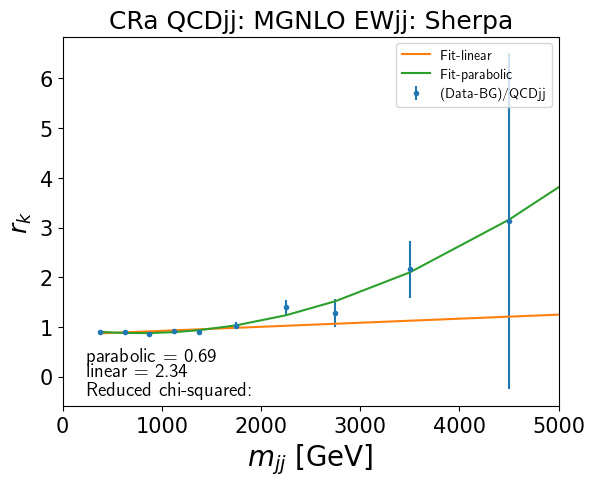

In [5]:
from MjjFit import display_fit_experiments
display_fit_experiments(experiments, "CRa", [f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_linear",
                                             f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic",
                                             #f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_exponential",
                                             ])

INFO: Displaying the figure without saving. 


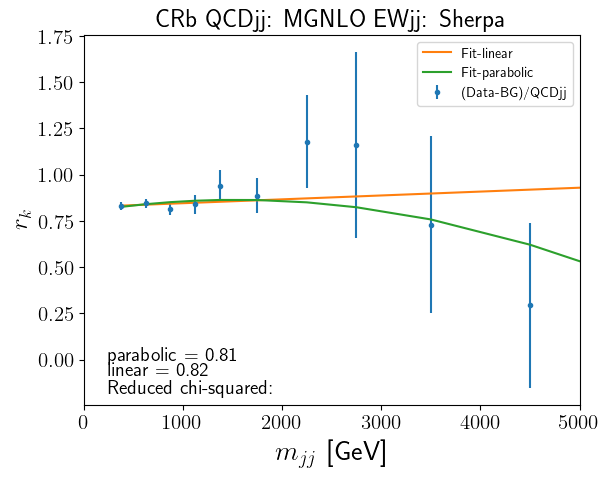

In [6]:
display_fit_experiments(experiments, "CRb", [f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_linear",
                                             f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic",
                                             #f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_exponential",
                                             ])

INFO: Displaying the figure without saving. 


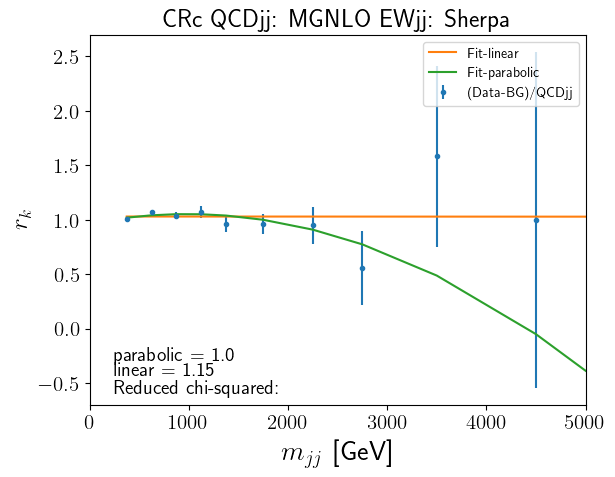

In [7]:
display_fit_experiments(experiments, "CRc", [f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_linear",
                                             f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic",
                                             #f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_exponential",
                                             ])

## Add the parabolic cutoff models for the CRs

In [8]:
from MjjFit import FitExperiment, parabolic_cutoff_model
import numpy as np

parabolic_experiment = experiments.get_experiment(f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic")
print(parabolic_experiment.make_single_prediction(2250))
experiment = FitExperiment(
    name = f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff",
    model = parabolic_cutoff_model,
    fit_parameters = parabolic_experiment.fit_parameters,
    fit_covariance = parabolic_experiment.fit_covariance,
    cutoff_value = 2250,
    x = parabolic_experiment.x,
    y = parabolic_experiment.y,
    y_uncer = parabolic_experiment.y_uncer,
)
experiments.add_experiment(experiment)

parabolic_experiment = experiments.get_experiment(f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic")
print(parabolic_experiment.make_single_prediction(2250))
experiment = FitExperiment(
    name = f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff",
    model = parabolic_cutoff_model,
    fit_parameters = parabolic_experiment.fit_parameters,
    fit_covariance = parabolic_experiment.fit_covariance,
    cutoff_value = 2250,
    x = parabolic_experiment.x,
    y = parabolic_experiment.y,
    y_uncer = parabolic_experiment.y_uncer,
)
experiments.add_experiment(experiment)

parabolic_experiment = experiments.get_experiment(f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic")
print(parabolic_experiment.make_single_prediction(2250))
experiment = FitExperiment(
    name = f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff",
    model = parabolic_cutoff_model,
    fit_parameters = parabolic_experiment.fit_parameters,
    fit_covariance = parabolic_experiment.fit_covariance,
    cutoff_value = 2250,
    x = parabolic_experiment.x,
    y = parabolic_experiment.y,
    y_uncer = parabolic_experiment.y_uncer,
)
experiments.add_experiment(experiment)

1.23+/-0.06
0.85+/-0.06
0.91+/-0.09


INFO: Saving the figure to results/CRa_EWjjSherpa_QCDjjMGNLO.pdf 


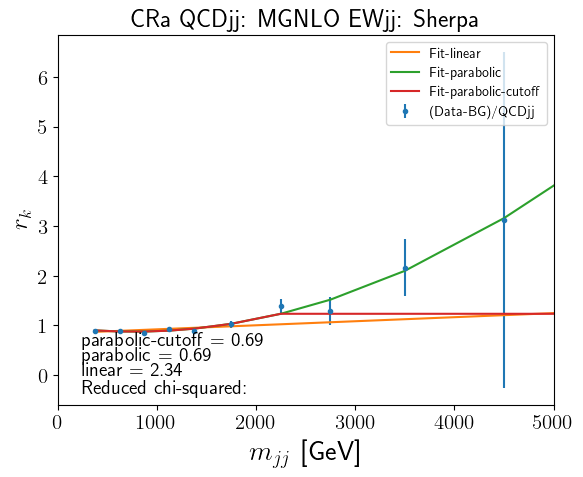

In [9]:
display_fit_experiments(experiments, "CRa", [f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_linear",
                                             f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic",
                                             #f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_exponential",
                                             f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff"],
                                             save = True, save_name = f"CRa_EWjjSherpa_QCDjj{QCD_sample_type}")

INFO: Saving the figure to results/CRb_EWjjSherpa_QCDjjMGNLO.pdf 


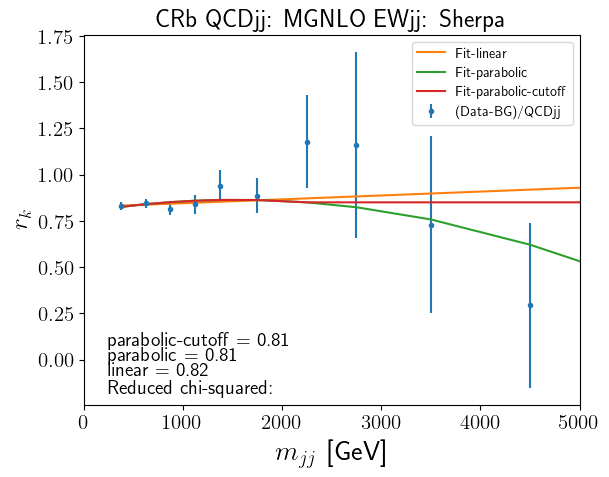

In [10]:
display_fit_experiments(experiments, "CRb", [f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_linear",
                                             f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic",
                                             #f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_exponential",
                                             f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff"],
                                             save = True, save_name = f"CRb_EWjjSherpa_QCDjj{QCD_sample_type}")

INFO: Saving the figure to results/CRc_EWjjSherpa_QCDjjMGNLO.pdf 


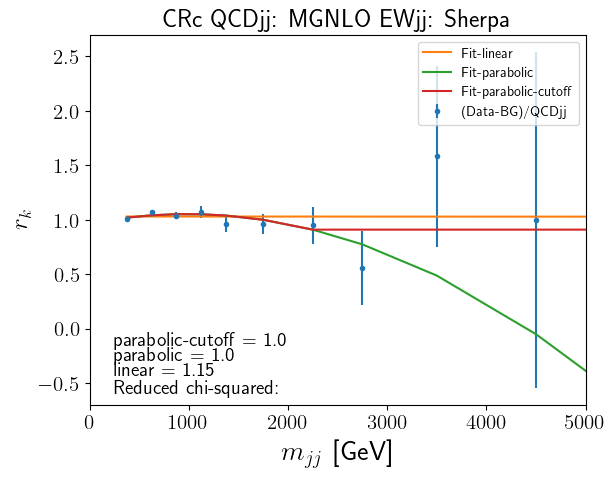

In [11]:
display_fit_experiments(experiments, "CRc", [f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_linear",
                                             f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic",
                                             #f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_exponential",
                                             f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff"],
                                             save = True, save_name = f"CRc_EWjjSherpa_QCDjj{QCD_sample_type}")

In [12]:
from MjjFit import predict_SR_from_experiments
x = parabolic_experiment.x
x = np.append(250, x)
SR_pred_from_parabolicCutoff_y, SR_pred_from_parabolicCutoff_error = predict_SR_from_experiments(experiments, experiment_type = f"EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff", x_axis = x)
SR_pred_from_parabolic_y, SR_pred_from_parabolic_error = predict_SR_from_experiments(experiments, experiment_type = f"EWjjSherpa_QCDjj{QCD_sample_type}_parabolic", x_axis = x)
#SR_pred_from_exponential_y, SR_pred_from_exponential_error = predict_SR_from_experiments(experiments, experiment_type = f"EWjjSherpa_QCDjj{QCD_sample_type}_exponential", x_axis = x)

print(x)


[ 250.  375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.]


INFO: Using point-by-point prediction mode. These are the axis of the CRs:  
INFO: CRa: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.] 
INFO: CRb: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.] 
INFO: CRc: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.] 
INFO: Found 10 valid elements in the CRs. Using them for the ABCD extrapolation 


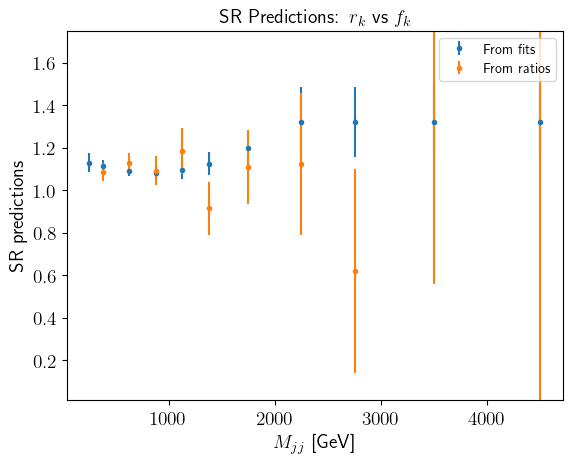

In [15]:
rk, rk_error = predict_SR_from_experiments(experiments, experiment_type = f"EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff", prediction_mode = 'point-by-point')
plt.errorbar(x,SR_pred_from_parabolicCutoff_y,yerr=SR_pred_from_parabolicCutoff_error,fmt='.', label='From fits')
plt.errorbar(x[1:len(rk)+1],rk,yerr=rk_error,fmt='.', label='From ratios')
plt.legend()
plt.xlabel(r'$M_{jj}$ [GeV]', fontsize=14)
plt.title(r"SR Predictions: $r_k$ vs $f_k$", fontsize=14)
plt.ylabel(r"SR predictions", fontsize=14)
# Make font of all things larger
plt.tick_params(labelsize=14)
if 'MGNLO' in QCD_sample_type:
    plt.ylim(0.01,1.75)
plt.savefig(f"results/SR_predictions_rk_vs_fk_EWjjSherpa_QCDjj{QCD_sample_type}.pdf")

In [16]:

SR_fit_from_parabolicCutoff, SR_cov_from_parabolicCutoff = mjj_fit_experiment(parabolic_model, x, SR_pred_from_parabolicCutoff_y, SR_pred_from_parabolicCutoff_error, experiment_name=f"SRFromCutoffCRs_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic", experiments_container=experiments)
SR2_fit_from_parabolic, SR2_cov_from_parabolic = mjj_fit_experiment(parabolic_model, x, SR_pred_from_parabolic_y, SR_pred_from_parabolic_error, experiment_name=f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic", experiments_container=experiments)
#SR3_fit_from_exponential, SR3_cov_from_exponential = mjj_fit_experiment(exponential_model, x, SR_pred_from_exponential_y, SR_pred_from_exponential_error, experiment_name=f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_exponential", experiments_container=experiments)

parabolic_experiment = experiments.get_experiment(f"SRFromCutoffCRs_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic")
print(parabolic_experiment.make_single_prediction(2250))
experiment = FitExperiment(
    name = f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff",
    model = parabolic_cutoff_model,
    fit_parameters = parabolic_experiment.fit_parameters,
    fit_covariance = parabolic_experiment.fit_covariance,
    cutoff_value = 2250,
    x = parabolic_experiment.x,
    y = parabolic_experiment.y,
    y_uncer = parabolic_experiment.y_uncer,
)
experiments.add_experiment(experiment)

INFO: Adding new experiment SRFromCutoffCRs_EWjjSherpa_QCDjjMGNLO_parabolic. 
INFO: Adding new experiment SR_EWjjSherpa_QCDjjMGNLO_parabolic. 
1.166+/-0.028


INFO: Saving the figure to results/SR_EWjjSherpa_QCDjjMGNLO.pdf 


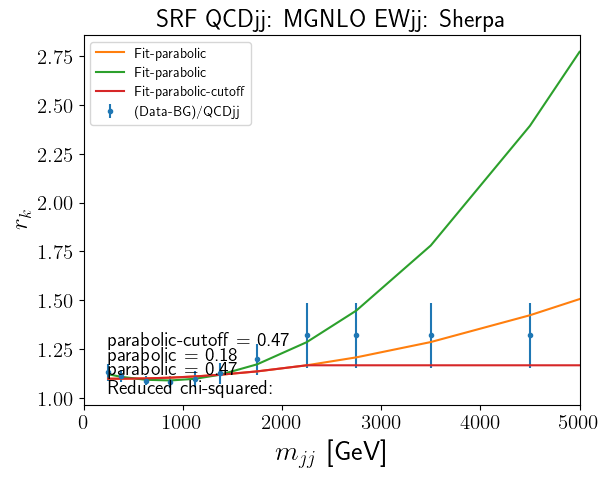

In [17]:
display_fit_experiments(experiments, "SR",
                        [f"SRFromCutoffCRs_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic",
                         f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic",
                         #f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_exponential",
                         f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff"],
                         save=True, save_name=f"SR_EWjjSherpa_QCDjj{QCD_sample_type}")

In [18]:
experiment = experiments.get_experiment(f"SRFromCutoffCRs_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic")
print(f"SRFromCutoffCRs_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic predictions:")
print("250 GeV:", experiment.make_single_prediction(250), " 5000 GeV:", experiment.make_single_prediction(5000))
print("\n")

experiment = experiments.get_experiment(f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic")
print(f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic predictions:")
print("250 GeV:", experiment.make_single_prediction(250), " 5000 GeV:", experiment.make_single_prediction(5000))
print("\n")

#experiment = experiments.get_experiment(f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_exponential")
#print(f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_exponential predictions:")
#print("250 GeV:", experiment.make_single_prediction(250), " 5000 GeV:", experiment.make_single_prediction(5000))
#print("\n")

experiment = experiments.get_experiment(f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff")
print(f"SR_EWjjSherpa_QCDjj{QCD_sample_type}_parabolic-cutoff predictions:")
print("250 GeV:", experiment.make_single_prediction(250), " 5000 GeV:", experiment.make_single_prediction(5000))
print("\n")

SRFromCutoffCRs_EWjjSherpa_QCDjjMGNLO_parabolic predictions:
250 GeV: 1.098+/-0.017  5000 GeV: 1.51+/-0.13


SR_EWjjSherpa_QCDjjMGNLO_parabolic predictions:
250 GeV: 1.120+/-0.011  5000 GeV: 2.77+/-0.34


SR_EWjjSherpa_QCDjjMGNLO_parabolic-cutoff predictions:
250 GeV: 1.098+/-0.017  5000 GeV: 1.166+/-0.028




# Write experiments to file

In [19]:
experiments.write_experiments_to_file(f'Fits_Zll_{QCD_sample_type}.txt')

INFO: Experiments written to file results/Fits_Zll_MGNLO.txt. 


# ABCD Closure correction

In [2]:

from histogramHelpers import templatesDict, get_histogram_from_collection, convert_to_numpy_histogram, get_histogram, process_histogram, a_times_b_divide_c
from MjjFit import FitExperimentContainer, mjj_fit_experiment, linear_model, parabolic_model, display_fit_experiments

# I am going to store the experiments in a container
abc_experiments_container = FitExperimentContainer()



In [3]:
def abc_vs_sr_closure(QCDjj_sample_file : str):

    root_path = '/Users/user/Documents/HEP/VBF-Analysis/VBFAnalysisPlots/Zll/NewZpeak/'
    path_CRa = os.path.join(root_path, "CRa", QCDjj_sample_file)
    path_CRb = os.path.join(root_path, "CRb", QCDjj_sample_file)
    path_CRc = os.path.join(root_path, "CRc", QCDjj_sample_file)
    path_SR = os.path.join(root_path, "SR", QCDjj_sample_file)

    QCD_sample_type = QCDjj_sample_file.replace('Zll_','').replace('.root','')


    # Get the Mjj histogram template
    HISTOGRAMS_TEMPLATE = templatesDict["llZpeakHistograms"]
    Mjj_template = get_histogram_from_collection("mass_jj", HISTOGRAMS_TEMPLATE)
    Mjj_template.m_binEdges = [1500,3000]  # Set the bin edges for the histogram
    Mjj_template.m_binSteps = [250,500,2000]  # Set the bin steps for the histogram
    Mjj_template.m_binNorm = 250  # Set the normalization factor for the histogram

    HISTOGRAMS_DICT = {}

    HISTOGRAMS_DICT["SR"] = get_histogram(path_SR, "mass_jj")
    HISTOGRAMS_DICT["CRa"] = get_histogram(path_CRa, "mass_jj")
    HISTOGRAMS_DICT["CRb"] = get_histogram(path_CRb, "mass_jj")
    HISTOGRAMS_DICT["CRc"] = get_histogram(path_CRc, "mass_jj")


    # Define the rebinning object
    rebining_object = biner(Mjj_template.m_binEdges, Mjj_template.m_binSteps, HISTOGRAMS_DICT["SR"])

    # Process each histogram in the dictionary
    for region in HISTOGRAMS_DICT:
        HISTOGRAMS_DICT[region] = process_histogram(HISTOGRAMS_DICT[region], rebin = rebining_object, norm_factor= Mjj_template.m_binNorm, density=True)


    # Calculate SR = CRa * CRc / CRb
    HISTOGRAMS_DICT["ABCD"] = a_times_b_divide_c(HISTOGRAMS_DICT["CRa"], HISTOGRAMS_DICT["CRc"], HISTOGRAMS_DICT["CRb"])

    HISTOGRAMS_DICT["ABCD"] = process_histogram(HISTOGRAMS_DICT["ABCD"], density=True)

    HISTOGRAMS_DICT["ratio"] = HISTOGRAMS_DICT["ABCD"].Clone("ratio")
    HISTOGRAMS_DICT["ratio"].Divide(HISTOGRAMS_DICT["SR"])

    # Convert histograms to NumPy format
    sr_hist = convert_to_numpy_histogram(HISTOGRAMS_DICT["SR"])
    abcd_hist = convert_to_numpy_histogram(HISTOGRAMS_DICT["ABCD"])
    ratio_hist = convert_to_numpy_histogram(HISTOGRAMS_DICT["ratio"])

    return ratio_hist

# Do the fits

In [6]:
MC_samples = ["Zll_SherpaNLO.root", "Zll_Sherpa.root", "Zll_MG.root", "Zll_MGNLO.root"]
for QCDjj_sample_file in MC_samples:
    # Calculate the ratio
    ratio_hist = abc_vs_sr_closure(QCDjj_sample_file)
    # Do the experiment fit.
    QCD_sample_type = QCDjj_sample_file.replace('Zll_','').replace('.root','')
    mjj_fit_experiment(linear_model, ratio_hist["bin_centers"][1:], ratio_hist["bin_contents"][1:], ratio_hist["bin_errors"][1:], experiment_name=f"CRabc_EWjjDummy_QCDjj{QCD_sample_type}_linear", experiments_container=abc_experiments_container)

INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 5000.]
INFO: Adding new experiment CRabc_EWjjDummy_QCDjjSherpaNLO_linear. 
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 5000.]
INFO: Adding new experiment CRabc_EWjjDummy_QCDjjSherpa_linear. 
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 5000.]
INFO: Adding new experiment CRabc_EWjjDummy_QCDjjMG_linear. 
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 5000.]
INFO: Adding new experiment CRabc_EWjjDummy_QCDjjMGNLO_linear. 


# Plot and save

INFO: Displaying the figure without saving. 


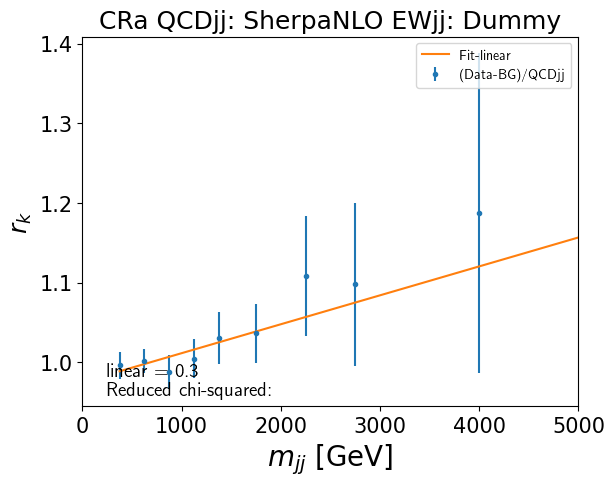

INFO: Displaying the figure without saving. 


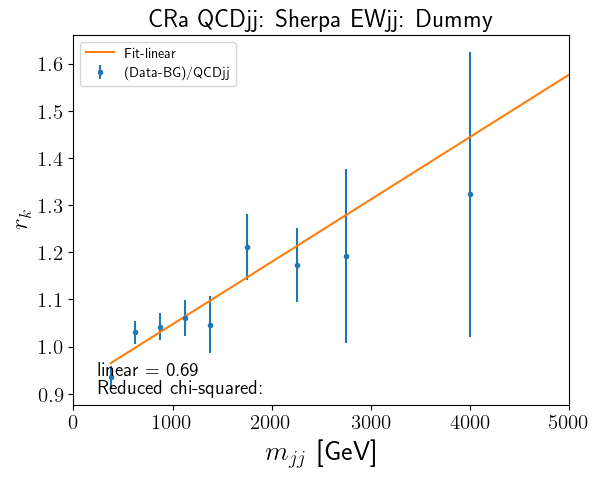

INFO: Displaying the figure without saving. 


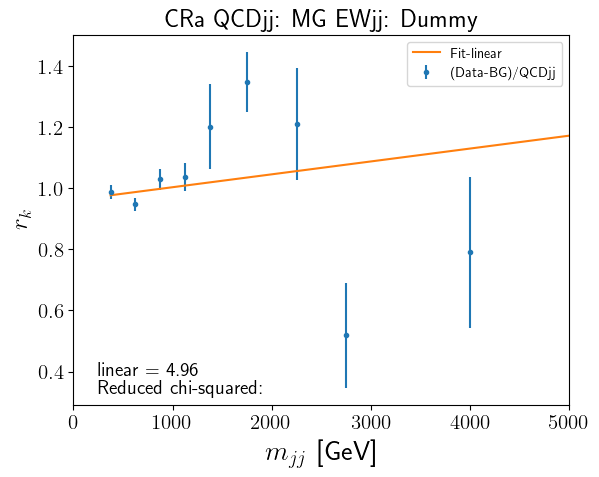

INFO: Displaying the figure without saving. 


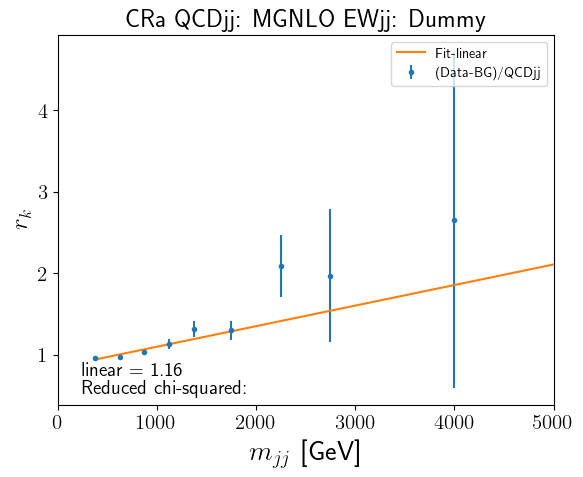

In [7]:
for QCD_sample_type in ["SherpaNLO", "Sherpa", "MG", "MGNLO"]:

    list_of_experiments = [f"CRabc_EWjjDummy_QCDjj{QCD_sample_type}_linear"]
    fig, ax = display_fit_experiments(abc_experiments_container, "CRabc", list_of_experiments)


    # Modify the plots accordingly

    ax.set_ylabel(r"$\frac{\frac{AB}{C}}{SR}$", rotation=0, fontsize=18, labelpad=10)
    # Set x-label padding
    ax.set_xlabel(r'$M_{jj}$ [GeV]', fontsize=14, labelpad=10)

    ax.set_title(r"QCDjj: %s - $\frac{AB}{C}$ vs SR" % QCD_sample_type, fontsize=14)
    # Turn off the legend
    ax.legend().set_visible(False)
    # Move the plot up
    ax.set_ylim(0.3, 2.6)
    # Increase bottom margin
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0 + 0.05, pos.width, pos.height - 0.05])
    fig.savefig(f"ABC_ClosureCorrection_{QCD_sample_type}.pdf")

# Save experiment parameters to a file

In [9]:
abc_experiments_container.write_experiments_to_file(f'ABCD_ClosureCorrection_Experiments.txt')

INFO: Experiments written to file results/ABCD_ClosureCorrection_Experiments.txt. 
